<a href="https://colab.research.google.com/github/aryadeo/NEURAL_NETWORK_BASICS/blob/master/Sigmoid_Neuron/Sigmoid_Neuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sigmoid Neuron
![alt text](https://drive.google.com/uc?id=19UQomkvg6X7U0_-wtzk5uRoyBa-t9VMy)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

#PLotting 2D sigmoid

The equation ofa sigmoid function is:


**$\sigma_{w,b}(x)=\frac{1}{1+e^{-wx+ b }}$**

In [0]:
def sig_2D(x,w,b):
  return 1/(1+np.exp(-(w*x+b)))

In [5]:
sig_2D(1,2,2)

0.9820137900379085

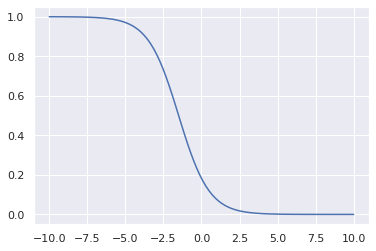

In [6]:
b=-1.5     #@param {type: "slider", min: -10, max: 10,step:0.5}
w=-1     #@param {type: "slider", min: -20, max: 20, step: 0.5}
X=np.linspace(-10,10,100)
Y=sig_2D(X,w,b)
plt.plot(X,Y)
plt.show()

#Plotting 3D Sigmoid

$\sigma_{W,b}(X)=\frac{1}{1+e^{-(\sum_i w_ix_i+b)}}$

In [0]:
def sig_3D(X,W,b):
  result=0
  for x,w in zip(X,W):
    result += np.sum(w*x)
  return 1/(1+(np.exp(-(result+b))))


In [0]:
X=np.array(([1,10],[2,20]))
W=np.array(([1,1],[0.1,0.1]))
b=2

In [9]:
result_f=sig_3D(X,W,b)
print(result_f)
print(np.ndim(result_f))

0.9999997495484255
0


As the result is coming as a scalar, hence the function defining procedure is wrong.

Let's correct the function again

In [0]:
def sig_3D(X,W,b):
    return 1/(1+(np.exp(-(W*X+b))))
# In this case the multiplication ill be element wise and it wwon't create any problem for multi dimensional tensor.

In [11]:
result=sig_3D(X,W,b)
print(result)
print(np.ndim(result))

[[0.95257413 0.99999386]
 [0.90024951 0.98201379]]
2


This is the correct output for the given input.

Now let's draw a surface plot for this.

In [0]:
from mpl_toolkits import mplot3d

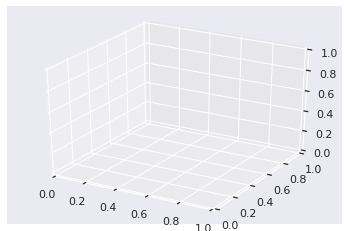

In [13]:
fig = plt.figure()
ax = plt.axes(projection='3d')

We need to create two vectors along the two axes and should create a meshgrid out of them

In [0]:
x1=np.linspace(-10,10,100)
x2=np.linspace(-10,10,100)
X_1,X_2=np.meshgrid(x1,x2)#np.meshgrid() Return coordinate matrices from coordinate vectors. So to access the first matrix we have assign X_1 and X_2.

# X_1 and X_2 both has the same elements. We can use any one of them to create the function evaluation.

In [15]:
Y=sig_3D(X_1,0.5,0)
print(Y)

[[0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 ...
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]
 [0.00669285 0.00739896 0.00817894 ... 0.99182106 0.99260104 0.99330715]]


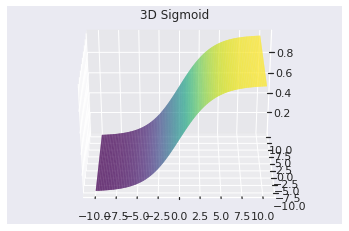

In [16]:
ax = plt.axes(projection='3d')
ax.plot_surface(X_1,X_2,Y, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('3D Sigmoid')
ax.view_init(30,270)

#Task_Contourf and Loss_Function
Date: 22.11.2019

Till now we have given a 2D tensor as X and W input to the sigmoid function and calculated the output as Y and plotted a 3D surface plot for Y vs X1 and X2. But Y is computed for X1 only.

Now we will compute Y for both X1 and X2 and will have a 3D surface plot for Y vs. X1 and X2. Y need to be a 2D tensor and X1 and X2 should also be a 2D tensor each.

So today we will do the following task.

1. Define a sigmoid function from two X tensors.
2. Plot the corresponding 3D plot of the Y vs (X1 and X2)
3. Compute the Loss and PLot the Loss vs (w and b)
4. plot the contour plot of Y vs (X1 and X2)



In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,1)


In [19]:
print(Y)
print(X1_g.shape)
print(type(X1_g))
print(Y.shape)

[[1.67014218e-05 1.84765467e-05 2.04403384e-05 ... 2.31116029e-01
  2.49550680e-01 2.68941421e-01]
 [1.84765467e-05 2.04403384e-05 2.26128482e-05 ... 2.49550680e-01
  2.68941421e-01 2.89258118e-01]
 [2.04403384e-05 2.26128482e-05 2.50162583e-05 ... 2.68941421e-01
  2.89258118e-01 3.10457825e-01]
 ...
 [2.31116029e-01 2.49550680e-01 2.68941421e-01 ... 9.99815183e-01
  9.99832937e-01 9.99848985e-01]
 [2.49550680e-01 2.68941421e-01 2.89258118e-01 ... 9.99832937e-01
  9.99848985e-01 9.99863492e-01]
 [2.68941421e-01 2.89258118e-01 3.10457825e-01 ... 9.99848985e-01
  9.99863492e-01 9.99876605e-01]]
(100, 100)
<class 'numpy.ndarray'>
(100, 100)


In [0]:
from mpl_toolkits import mplot3d

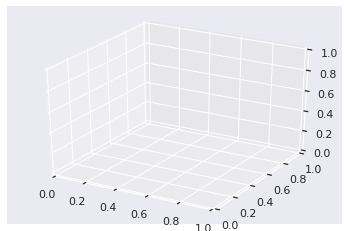

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')

Text(0.5, 0, 'Z')

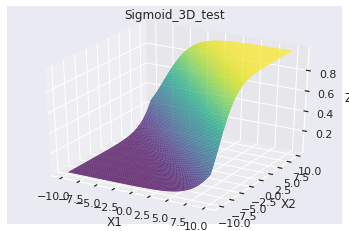

In [22]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1_g,X2_g,Y, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
ax.set_title('Sigmoid_3D_test')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Z')
#ax.view_init(30,270)

Task:2

$Loss=\sum_i(y_i-\hat{y_i})^2$

where 

$\hat{y_i}=predicted\space output$ 

$y_i=ground \space truth$

In [0]:
#computing the loss from a X 
def sigmoid_test(X,W,b):
  return 1/(1+(np.exp(-(W*X+b))))

def loss_func(X,Y,W,b):
  loss=0
  Y_h=sigmoid_test(X,W,b)
  for y,y_h in zip (Y,Y_h):
    loss+=(y-y_h)**2
  return loss

In [0]:
# X=np.linspace(-10,10,100)
X = np.random.random(25) * 20 - 10

[0.45309667 0.04015306 0.01707926 0.08369451 0.83829424 0.03122498
 0.01033314 0.92056945 0.39340666 0.99157137 0.37078919 0.108983
 0.01416032 0.05353027 0.00969317 0.98244971 0.57834471 0.03424001
 0.98967258 0.07317294 0.03596696 0.95000389 0.64626994 0.94312733
 0.66827861]


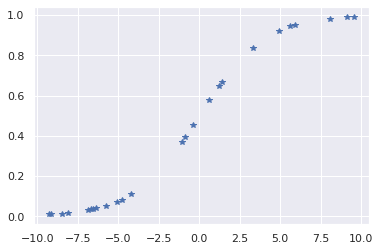

In [25]:
#Create a ground truth for all X
Y=sigmoid_test(X,0.5,0)
print(Y)
plt.plot(X,Y,'*')
plt.show()

In [26]:
#create a mshgrid of W and b and see the effect of change in their values over the loss function
W=np.linspace(0,1,101)
B=np.linspace(-1,1,101)
W_g,B_g=np.meshgrid(W,B)
print(W_g.shape,B_g.shape)

(101, 101) (101, 101)


In [27]:
#Let's create a null array for Loss values and compute the loss for every value of W in the meshgrid
Loss_matrix=np.zeros(W_g.shape)

# for l in range(W.shape[0]):

for i in range(W_g.shape[0]):
  for j in range(W_g.shape[1]):
    Loss_matrix[i,j]=loss_func(X,Y,W_g[i,j],B_g[i,j])
print(Loss_matrix)

[[4.30053238 4.0989667  3.9027643  ... 0.28190904 0.2823698  0.28286672]
 [4.27315487 4.06928661 3.87100811 ... 0.27496253 0.27551056 0.27609404]
 [4.2463185  4.04014919 3.83979693 ... 0.26814596 0.26878037 0.26944951]
 ...
 [6.26503003 5.99632659 5.72984679 ... 0.30152654 0.3023521  0.30317269]
 [6.32793376 6.06098359 5.79599166 ... 0.30877271 0.30953673 0.31029565]
 [6.39105248 6.12589192 5.86242685 ... 0.31612515 0.31682775 0.31752514]]


In [28]:
print(Loss_matrix.shape)

(101, 101)


Text(0.5, 0, 'Loss')

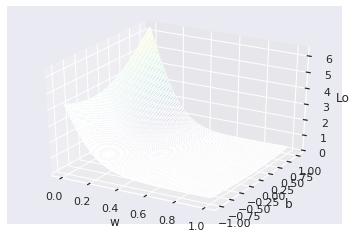

In [29]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(W_g, B_g, Loss_matrix,rstride=1, cstride=1, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

Task-3: Creation of a contour map


In [0]:
import matplotlib.colors

In [0]:
cmap_test = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","green","blue"])

In [0]:
#definig the sigmoid function
def sigmoid_3D_test(X1,X2,W1,W2,b):
  return 1/(1+np.exp(-(W1*X1+W2*X2)+b))

In [0]:
#define X1 and X2
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
X1_g,X2_g=np.meshgrid(X1,X2)
Y=sigmoid_3D_test(X1_g,X2_g,0.5,0.5,0)


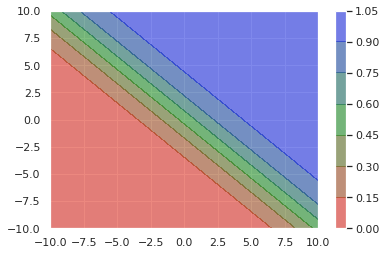

In [34]:
plt.contourf(X1_g,X2_g,Y,cmap=cmap_test,alpha=0.5)#alpha value determines the transperency of the colours
plt.colorbar()
plt.show()

Now by changing the value of w1 and w2 we can change the differences

Task completed

#Class_for_Sigmoid

In [0]:
class Sigmoid_Neuron:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,epochs=1,lr_rate=1,initialize=True):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
 

    for i in range(epochs):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -=lr_rate*dw
      self.b -=lr_rate*db

#Ft for Toy Data

In [0]:
X=np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y=[1,1,1,0,0,0]

In [0]:
sn=Sigmoid_Neuron()#instantization of the class
sn.fit(X,Y,100,0.2,True)

In [38]:
#instead of running it for twenty epochs we are declaring the epochs from an outer for loop.
for i in range(20):
  sn.fit(X,Y,1,0.1,False)#as the initialzation is done previously, ther eis no need for reinitialization. So the intialize is stated 'False'
  print(sn.w,sn.b)


[[ 1.94082978 -0.63470675]] [-0.81282386]
[[ 1.94310683 -0.63544543]] [-0.81431161]
[[ 1.94537298 -0.6361806 ]] [-0.81579161]
[[ 1.94762833 -0.63691227]] [-0.81726391]
[[ 1.94987296 -0.63764049]] [-0.8187286]
[[ 1.95210699 -0.63836529]] [-0.82018575]
[[ 1.95433051 -0.63908668]] [-0.82163544]
[[ 1.95654361 -0.63980472]] [-0.82307772]
[[ 1.9587464  -0.64051942]] [-0.82451268]
[[ 1.96093896 -0.64123082]] [-0.82594038]
[[ 1.96312138 -0.64193895]] [-0.82736089]
[[ 1.96529376 -0.64264384]] [-0.82877427]
[[ 1.96745618 -0.6433455 ]] [-0.8301806]
[[ 1.96960874 -0.64404399]] [-0.83157994]
[[ 1.97175151 -0.64473931]] [-0.83297235]
[[ 1.9738846  -0.64543151]] [-0.83435789]
[[ 1.97600807 -0.6461206 ]] [-0.83573663]
[[ 1.97812203 -0.64680661]] [-0.83710863]
[[ 1.98022654 -0.64748958]] [-0.83847396]
[[ 1.98232169 -0.64816952]] [-0.83983267]


Changing the learning rate of the fit function we can observe how the weight value varies.

Now Let's plot the contour plot for every epochs.
So we need to define another class for plotting the variables.

In [0]:
def plot_sigmoid(X,Y,sn):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])#This altering indexing is important!!!!.......x coordinate is X2[j] and y coordinate is X1[i]
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  plt.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  plt.plot()
  plt.show()

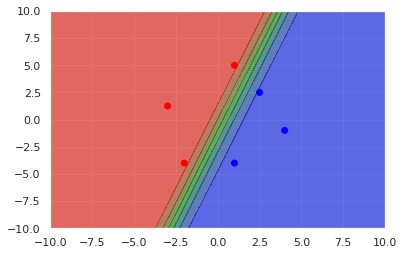

In [40]:
  plot_sigmoid(X,Y,sn)#We are just calling the class for plotting....its just for testing

Now let's plot the contour plot for every epoch.

To do that we have to create a subplot for plotting the result of each epoch. That's why we need to create a handler in the defined plotting class and modify it a little.

In [0]:
def plot_sigmoid(X,Y,sn,ax):
  X1=np.linspace(-10,10,100)
  X2=np.linspace(-10,10,100)
  X1_g,X2_g=np.meshgrid(X1,X2)
  Y1_g=np.zeros(X1_g.shape)
  for i in range(X1.size):
    for j in range(X2.size):
      val=np.asarray([X2[j],X1[i]])
      Y1_g[i,j]=sn.sigmoid(sn.perceptron(val))
  ax.contourf(X1_g,X2_g,Y1_g,cmap=cmap_test,alpha=0.6)
  ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)#X[:,0] implies all row of 1st column
  ax.plot()
  return Y1_g
  # ax.show()

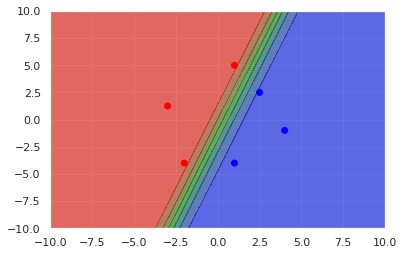

In [42]:
ax=plt.subplot()
Y1_g_test=plot_sigmoid(X,Y,sn,ax)

In [43]:
print(type(Y1_g_test))
print(np.ndim(Y1_g_test))
print(Y1_g_test.shape)

<class 'numpy.ndarray'>
2
(100, 100)


[[ 0.66941059 -0.45623929]] [-0.04364483]
[[ 0.98029856 -0.05692397]] [-0.0878705]
[[ 0.95617375 -0.5582724 ]] [-0.15483451]
[[ 1.20778692 -0.18392029]] [-0.2040107]
[[ 1.170239   -0.57326303]] [-0.27572524]
[[ 1.34677454 -0.3104128 ]] [-0.31992589]
[[ 1.33322485 -0.53474048]] [-0.37331599]
[[ 1.42779983 -0.42185122]] [-0.40610828]
[[ 1.44650238 -0.49900656]] [-0.44080852]
[[ 1.49345005 -0.48378396]] [-0.46820492]
[[ 1.52470273 -0.50380181]] [-0.49483901]
[[ 1.55770325 -0.51179528]] [-0.51906204]
[[ 1.58770858 -0.52198066]] [-0.54176611]
[[ 1.61614374 -0.53106837]] [-0.56298452]
[[ 1.64298058 -0.53972097]] [-0.58290558]
[[ 1.668406   -0.54791333]] [-0.60166173]
[[ 1.69255476 -0.55569554]] [-0.61937028]
[[ 1.71554521 -0.56310549]] [-0.63613229]
[[ 1.73748027 -0.5701763 ]] [-0.6520356]
[[ 1.75844993 -0.57693693]] [-0.66715694]
[[ 1.77853336 -0.58341286]] [-0.68156365]
[[ 1.79780053 -0.58962659]] [-0.69531512]
[[ 1.81631355 -0.59559809]] [-0.70846393]
[[ 1.83412783 -0.60134518]] [-0.72105

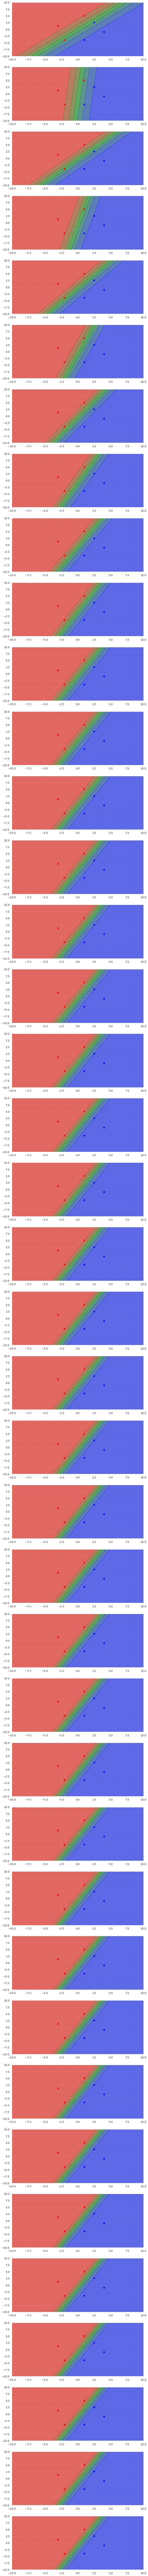

In [44]:
sn.fit(X,Y,1,0.6,True)
num_epochs=40
plt.figure(figsize=(10,num_epochs*5))
Y1_g_all=[]#reqquired for storing the predicted output of each apoch
for i in range(num_epochs):
  Y1_g_test=[]
  print(sn.w,sn.b)
  ax=plt.subplot(num_epochs,1,i+1)
  Y1_g_test=plot_sigmoid(X,Y,sn,ax)
  sn.fit(X,Y,1,0.6,False)
  Y1_g_all.append(Y1_g_test)
Y1_g_all=np.asarray(Y1_g_all)#just to go safe we are converting the list into an array

Here we are observing that classification is getting better over increasing epochs.

#Animation of this coutour plot

In [0]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

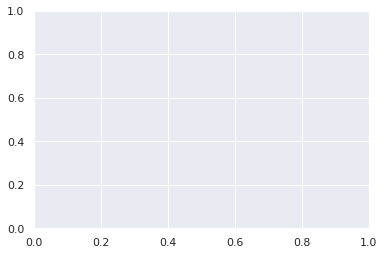

In [46]:
fig,ax = plt.subplots()

In [0]:
def animate(i):
       ax.clear()
       ax.contourf(X1_g,X2_g,Y1_g_all[i][:,:],cmap=cmap_test,alpha=0.6)
       ax.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_test)
       ax.set_title('%03d'%(i+1)) 

In [0]:
ani = animation.FuncAnimation(fig,animate,frames=num_epochs,interval=1000,blit=False)

In [49]:
HTML(ani.to_html5_video())

The trick here is:

For every iteration we are clearning the figure and by making the blit=False we are just showing the entire new figure in the next iteration.

#Data Loading

In [50]:
!ls

drive  sample_data


We need to load the data. We don't have dropbox. So need to load it from google drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!ls

drive  sample_data


In [0]:
my_file=open('/content/drive/My Drive/PadhAI (Download Materials)/mobile_cleaned-1549119762886.csv','r')

In [54]:
print(my_file.read())

sim_type,aperture,gpu_rank,weight,stand_by_time,processor_frequency,thickness,flash_type,front_camera_resolution,auto_focus,screen_size,frames_per_second,FM,no_of_reviews_in_gsmarena_in_week,os,phone_height,screen_protection,sim_size,price,talk_time,video_resolution,display_resolution,removable_battery,display_type,primary_camera_resolution,battery_type,ram_memory,internal_memory,brand_rank,no_of_cores,micro_sd_slot,screen_pixel_density,water_proof_rate,phone_width,expandable_memory,version,usb_type,battery_capacity,processor_rank,is_liked
0,12,55,155.0,250,1.3,10.5,5,2.0,0,4.5,15,3,0,0,132.9,26,3,3870,9,480,12,3,11,5.0,1,1,7,29,6,4,2,3,67.8,64.0,5,3,2000,125,1
0,1,55,132.0,300,1.3,10.6,5,0.3,1,4.0,30,2,6,0,124.5,26,5,4059,9,720,15,3,11,5.0,1,1,7,11,6,4,4,6,64.0,32.0,5,3,2000,165,1
0,9,55,142.0,329,1.5,8.5,5,2.0,3,5.0,30,2,20,0,145.5,4,3,4777,10,1080,4,3,1,5.04,2,1,7,27,6,4,9,6,72.0,32.0,6,3,2500,164,0
0,8,55,152.0,385,1.3,8.0,5,2.0,3,5.0,15,3,0,0,147.5,26,3,5799,19,720,17,3,2,5.0,1,1,

Just observe that without using the pandas library how clumsy the data reading operation is.

In [0]:
import pandas as pd

In [0]:
my_file=pd.read_csv('/content/drive/My Drive/PadhAI (Download Materials)/mobile_cleaned-1551253091700.csv')

In [57]:
my_file.shape

(341, 88)

In [58]:
my_file.head()

,PhoneId,Pixel Density,Screen Size,Weight,RAM,Processor_frequency,Screen to Body Ratio (calculated),Height,Internal Memory,Capacity,Resolution,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Meizu,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",Sim1_2G,Sim1_3G,Sim1_4G,Rating
0,0,403,6.26,182,4,1.8,80.68,157.9,64,4000,20,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
1,1,271,6.20,168,3,1.8,80.85,156.2,32,4230,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.5
2,2,409,6.30,168,3,2.1,83.68,157.0,32,3500,25,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4
3,4,411,6.00,169,4,2.2,74.78,159.8,64,3300,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,4.3
4,5,396,6.50,175,4,2.2,84.23,160.4,64,3750,16,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,4.4


Here we are!

We have a final output of mobile phone rating. But we need those ratings as a binarized variables. Because the sigmoid neuron output is binarized. To compare the accuracy, we need to binarize our original ground truths.

In [0]:
#let's create X and Y
X=my_file.drop('Rating',axis=1)
Y=my_file['Rating'].values #type is changed to array just for the sake of convenience

In [60]:
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [0]:
#alternative way of converting the true false to 1 and 0 respectively.
thld=4.2
my_file['class']=(my_file['Rating']>thld).astype(np.int)#here the true and false created by threshole value are converted to 1 and 0 respectively by converting there type as int.

In [0]:
Y_bin=my_file['class'].values

In [0]:
#a longer process of converting the true false into  1 and 0 form without using any of the librarfy function
thld=4.2
Y_bin_1= Y >= thld
Y_bin=[]
for i in range(Y_bin_1.size):
  Y_bin.append(int(Y_bin_1[i]))
Y_bin=np.asarray(Y_bin)

The selection of the threshold value matters. Because the standard procedure for checking is that the percentage of each category(1 and 0) should approach 50%. Here for thld=4.1 it is approaching 50%. So we have selected it.

In [64]:
print(Y_bin.shape)

(341,)


In [65]:
my_file['class']=Y_bin
my_file['class']

0      1
1      1
2      1
3      1
4      1
      ..
336    0
337    0
338    0
339    0
340    1
Name: class, Length: 341, dtype: int64

In [66]:
my_file['class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: class, dtype: float64

Just to choose the proper thrshold value, we have assigned Y_bin to a dataframe and applied the value_counts opoeration it.
This is just for checking purpose only.

##Standardization

Standardization of a dataset means each column of the dataframe should have a mean of 0 and a standard deviation of 1.

$z=\frac{x-\mu}{\sigma}\\where,\\\mu= mean\;of\;the\;series \\ \sigma=standard\; deviation\ of\ the \ series $

This is required just to avoid the large variation in the values of each column in a dataset. While some column values ranges from 5 to 50 other column values ranges between 1000 to 5000. So the objective is to standardize every column in a dataset

###standardization on sample data
Let's try it for a sample serie of data

In [0]:
sample_data=np.random.random([100,1])

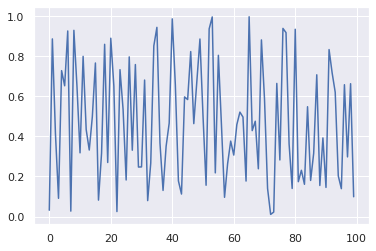

In [68]:
plt.plot(sample_data)
plt.show()

In [69]:
print(sample_data.mean())
print(sample_data.std())

0.47533001384588613
0.2927891912801844


Here we can see that the data is being varied betwn 0 to 1.

The mean and standard deviation are not 0 and 1 respectively. 

 Let's apply standardization on it.

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()

In [72]:
scaler.fit(sample_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
print(scaler.mean_)

[0.47533001]


In [0]:
sample_data_transformed=scaler.fit_transform(sample_data)

In [75]:
np.mean(sample_data_transformed)

5.551115123125783e-17

In [76]:
np.std(sample_data_transformed)

1.0

Here we can see that after applying standardization, the mean becomes 0 and the standard deviation becomes 1.

Let's plot them

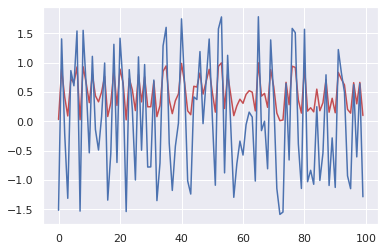

In [77]:
plt.plot(sample_data,'r-',sample_data_transformed,'b-')
plt.show()

###Standardization of test and training data

NOw let's do the standardization on a taining ans test data

concept:

For input data:
1. Apply the 'fit_transform' standardization on the train data.
2. Apply the scaling of the training data on the test data.

For output real valued data:
1. Apply normalization between the minimum and maximum value of the output data
2. First scale the output training set and apply that scaling factor on the output test set

Let's first split the input and output data.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler

Now we need to divide the X and Y data into trainig and test set

In [0]:
# #let's create X and Y
# X=my_file.drop('Rating',axis=1)
# Y=my_file['Rating'].values #type is changed to array just for the sake of convenience

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,stratify=Y_bin)#try with inserting argument "test_size=0.1"
#as random_state=0 so no randomness is there in selecting the test and train samples. We have made it 0 so that the values doesn't change.

In [81]:
#Let's chack whether the splitting is stratified or not
print(X_train.mean())
print('--------------------')
print(X_test.mean())
print('--------------------')
print(Y_train.mean())
print(Y_test.mean())

PhoneId                                      233.286275
Pixel Density                                344.576471
Screen Size                                    5.477216
Weight                                       162.384314
RAM                                            9.627451
                                                ...    
SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE      0.160784
SIM Slot(s)_Single SIM, GSM                    0.094118
Sim1_2G                                        0.019608
Sim1_3G                                        0.023529
Sim1_4G                                        0.956863
Length: 87, dtype: float64
--------------------
PhoneId                                      232.034884
Pixel Density                                343.127907
Screen Size                                    5.418140
Weight                                       158.255814
RAM                                           15.546512
                                                ...    


In [0]:
Scaler=StandardScaler()

In [0]:
X_train_scaled=Scaler.fit_transform(X_train)
X_test_scaled=Scaler.transform(X_test)

In [0]:
min_max_scaler=MinMaxScaler()

In [85]:
Y_train_scaled=min_max_scaler.fit_transform(Y_train.reshape(-1,1))
print(np.min(Y_train_scaled))
print(np.max(Y_train_scaled))

0.0
1.0


In [0]:
Y_test_scaled=min_max_scaler.transform(Y_test.reshape(-1,1))

In [87]:
print(np.min(Y_test_scaled))
print(np.max(Y_test_scaled))

0.11999999999999988
1.0


In [0]:
thld_scaled=min_max_scaler.transform(np.asarray([thld]).reshape(-1,1))[0][0]

In [89]:
type(thld_scaled)

numpy.float64

In [0]:
Y_bin_train=(Y_train_scaled > thld_scaled).astype(np.int).ravel()#np.ravel() is used to flaten the np array created.

In [0]:
Y_bin_test=(Y_test_scaled > thld_scaled).astype(np.int).ravel()

#Accuracy_Measurement

Now we are ready with

1. X_train_scaled
2. X_test_scaled
3. Y_bin_train(this is scaled over thld_scaled)
4. Y_bin_test(this is sclaed over thld_scaled)

Now let's fit the model for these scaled data and find the accuracy on training and testing.

Now let's rewrite the sigmoid class with the following modifications.
1. a predict function inside it. Beacuse we didm't have that before.
2. a display function to plot the loss and accuracy
3. a library initialization to display the progress bar

To measure these metrics, we have to import some library from sklearn

In [0]:
from sklearn.metrics import accuracy_score,mean_squared_error
from tqdm import tqdm_notebook  #to show a progress bar

In [0]:
class Sigmoid_Neuron_1:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,epochs=1,lr_rate=1,initialize=True, display_loss=False):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,X.shape[1])
      self.b=0

      if display_loss:
        loss=[]
 
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)
      self.w -=lr_rate*dw
      self.b -=lr_rate*db

      if display_loss:
        y_pred=self.sigmoid(self.perceptron(x))
        loss.append(mean_squared_error(y_pred,y))
      
    if display_loss:
      plt.plot(np.array(loss))
      plt.xlabel('epochs')
      plt.ylabel('mean_squared_error')
      plt.show()

In [0]:
sn=Sigmoid_Neuron_1()

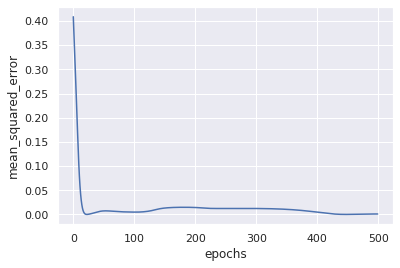

In [0]:
sn.fit(X_train_scaled,Y_train_scaled,epochs=500,lr_rate=0.01,display_loss=True)

In [0]:
Y_train_pred=sn.predict(X_train_scaled)
Y_test_pred=sn.predict(X_test_scaled)

In [0]:
Y_train_pred_bin=(Y_train_pred>thld_scaled).astype(np.int).ravel()
Y_test_pred_bin=(Y_test_pred>thld_scaled).astype(np.int).ravel()

In [0]:
accuracy_train=accuracy_score(Y_bin_train,Y_train_pred_bin)
accuracy_test=accuracy_score(Y_bin_test,Y_test_pred_bin)

In [99]:
print(accuracy_train,accuracy_test)

0.7686274509803922 0.8023255813953488


#Task: Plotting the loss function and accuracy simultaneously

In [0]:
#to show the plot legends
import matplotlib.patches as mpatches


In [0]:
class Sigmoid_Neuron_2:
  def __init__(self):
    self.w=None
    self.b=None
  
  def perceptron(self,x):
    return np.dot(x,self.w.T)+self.b #we have taken the dot product of transpose of Weight matrix and the input vector just to avoid any size mismatch
  
  def sigmoid(self,x):
    return 1.0/(1+np.exp(-x))
  
  def predict(self,X):
    Y_pred=[]
    for x in X:
      y_pred=self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

  
  def grad_w(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)*x
  
  def grad_b(self,x,y):
    y_pred=self.sigmoid(self.perceptron(x))
    return (y_pred-y)*y_pred*(1-y_pred)
  
  def fit(self,X,Y,Y_bin_train,epochs=1,lr_rate=1,initialize=True, display_loss=False,show_accuracy=False,thld=0):
    if initialize:    #if initialization is required then we will proceed for this otherwise we will proceed with the previous value of w and b
      self.w=np.random.randn(1,X.shape[1])
      self.b=0
      

      if display_loss:
        loss=[]
        accuracy_train=[]
        
        

 
    for i in tqdm_notebook(range(epochs),total=epochs,unit="epoch"):
      Y_train_pred=[]
      dw=0
      db=0
      for x,y in zip(X,Y):
        dw += self.grad_w(x,y)
        db += self.grad_b(x,y)

        if show_accuracy:
          y_pred=self.sigmoid(self.perceptron(x))
          if y_pred>thld:
            y_train_pred_bin=1
          if y_pred<=thld:
            y_train_pred_bin=0
          Y_train_pred.append(y_train_pred_bin)
     
      accuracy_train.append(accuracy_score(Y_bin_train,Y_train_pred))

      self.w -=lr_rate*dw
      self.b -=lr_rate*db


      if display_loss:
        y_pred=self.sigmoid(self.perceptron(x))
        loss.append(mean_squared_error(y_pred,y))

  
        
    if display_loss:
      blue_patch = mpatches.Patch(color='blue', label='loss')
      red_patch = mpatches.Patch(color='brown', label='accuracy')
      plt.legend(handles=[blue_patch,red_patch])
      plt.plot(np.array(loss),'b-')
      plt.plot(np.asarray(accuracy_train),'r-')
      plt.xlabel('epochs')
      plt.ylabel('mean_squared_error vs accurcay')
      plt.show()
    
   

In [0]:
sn_2=Sigmoid_Neuron_2()

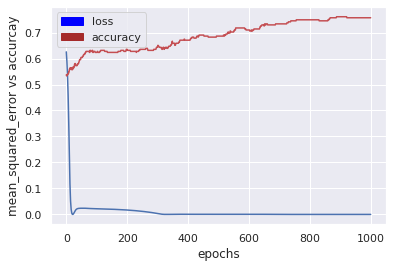

In [273]:
sn_2.fit(X_train_scaled,Y_train_scaled,Y_bin_train,thld=0.68,epochs=1000,lr_rate=0.01,display_loss=True,show_accuracy=True)